In [1]:
from config import *
from functions import *
from sim import *
from read_ramses import *

from types import SimpleNamespace

# plotting
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib

# math
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import trapz, cumtrapz

# cosmology
from colossus.cosmology import cosmology
from colossus.lss import peaks
from colossus.lss import mass_function
cosmo = cosmology.setCosmology('planck18');
import const

# yt
import yt
from yt.visualization.fixed_resolution import FixedResolutionBuffer


In [2]:
boxlen = 100 * const.Mpc / const.h0 # box size [Mpc/h0]

move_to_sim_dir(9, 'fiducial')


Moving to directory '/home/za9132/scratch/romain/round9/fiducial'.


'/home/za9132/scratch/romain/round9/fiducial'

In [3]:
if os.path.isfile('starcat/data.npz'):
    stardata = np.load('starcat/data.npz')
    time1d = stardata['time1d']
    SFR1d = stardata['starmass_hist1d']


0.05


Text(0.01, 0.96, '$z = 9.00$\n$t = 557.92~{\\rm Myr}$')

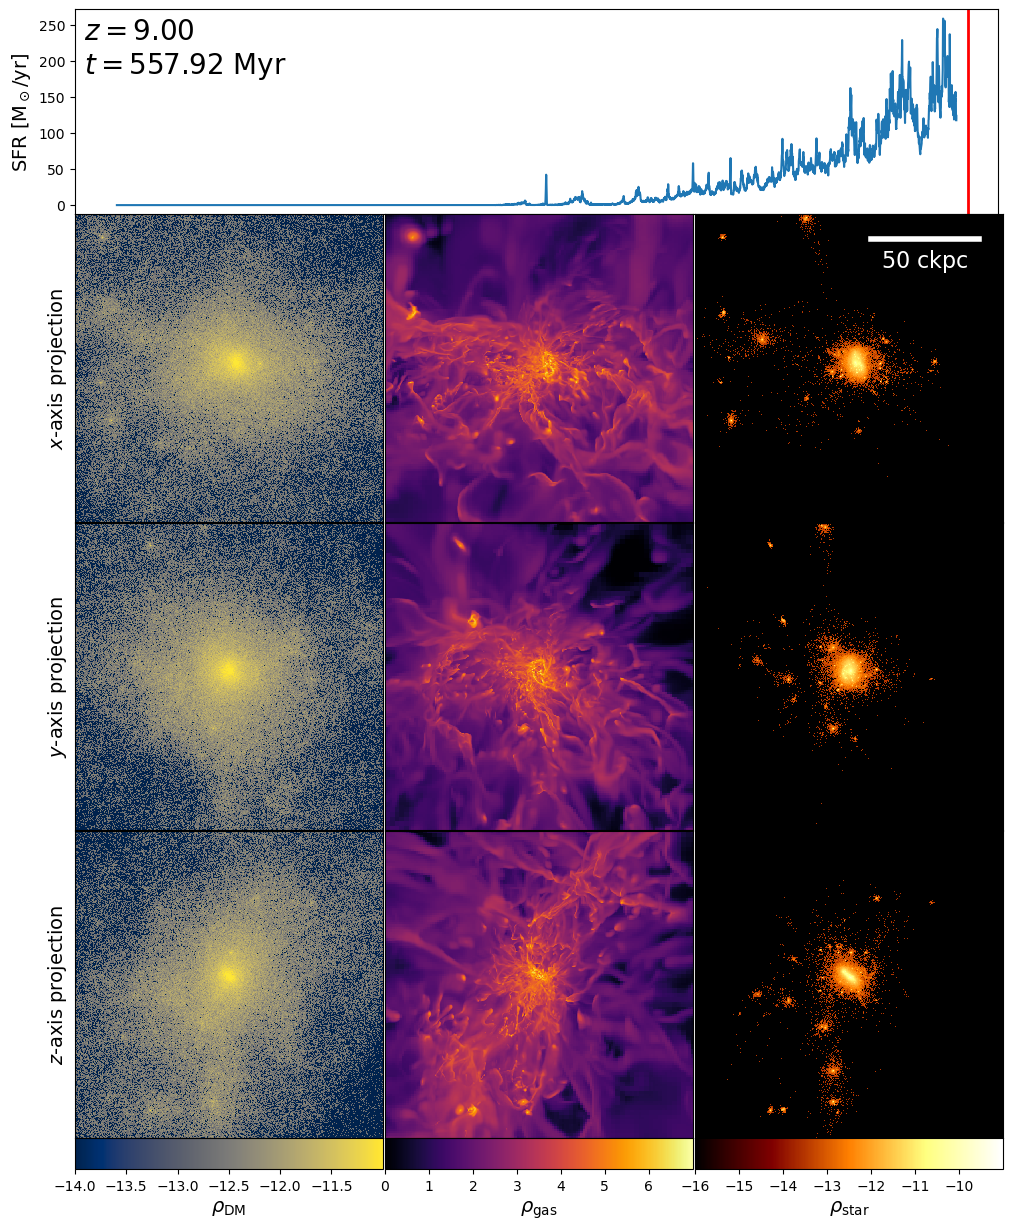

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharex=True, sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

for i in range(3):
    
    idx_proj = [X, Y, Z][i]
    coord1_idx, coord2_idx = np.sort([(idx_proj+1)%3, (idx_proj+2)%3])
    
    for j in range(3):
        
        ax = axs[i, j]
        ax.set_xticks([])
        ax.set_yticks([])
        
        idx_proj = [X, Y, Z][i]
        var = ['dm', 'dens', 'stars'][j]
        vmin = [-14, 0, -16][j]
        vmax = [-11, 7, -9][j]
        cmap = ['cividis', 'inferno', 'afmhot'][j]
        mapfile = 'movie%d/%s_01999.map'%(idx_proj+1, var)
        
        # read map file
        with FortranFile(mapfile, 'r') as f:
            aexp, dx, dy, dz = f.read_reals('f8')
            nx, ny = f.read_ints('i')
            data = f.read_reals('f4')
        data = np.array(data).reshape(ny, nx)
        time = aexp_to_proper_time(aexp)

        # calculate frame size
        size_img_coord1 = [dx, dy, dz][coord1_idx] * boxlen / const.kpc # frame size [kpc]
        size_img_coord2 = [dx, dy, dz][coord2_idx] * boxlen / const.kpc # frame size [kpc]
        extent = [-size_img_coord1/2, size_img_coord1/2, -size_img_coord2/2, size_img_coord2/2]

        im = ax.imshow(np.log10(data+1e-30), cmap=cmap, interpolation='nearest', origin='lower', extent=extent, vmin=vmin, vmax=vmax)

        if i==2:
        
            cax = ax.inset_axes([0, -0.1, 1, 0.1])
            cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
            cax.set_xticks(cax.get_xticks()[:-1])
            cbar.set_label(r'$\rho_{\rm %s}$'%(['DM', 'gas', 'star'][j]), fontsize=14)
            
        if j==0: ax.set_ylabel('$%s$-axis projection' % ['x', 'y', 'z'][i], fontsize=14)
        
axs[0, 2].plot([10, 60], [60, 60], color='white', lw=4)
axs[0, 2].annotate(r'$50~{\rm ckpc}$', xy=(35, 56), verticalalignment='top', horizontalalignment='center', color='white', fontsize=16)
        
axtop = axs[0, 0].inset_axes([0, 1, 3, 2/3])
axtop.set_xticks([])
axtop.plot(time1d/const.Myr, SFR1d/(const.M_sol/const.yr))
axtop.set_ylabel(r'SFR [${\rm M_\odot/{\rm yr}}$]', fontsize=14)
axtop.axvline(x=time/const.Myr, color='red', lw=2)

print(np.min(time1d)/const.Myr)

axtop.annotate(r'$z = %.2f$' % (1/aexp-1) + '\n' + r'$t = %.2f~{\rm Myr}$' % (time/const.Myr), fontsize=20, xy=(0.01, 0.96), xycoords='axes fraction', verticalalignment='top')
    

In [24]:
import re

files = os.listdir('movie1')

[int(re.findall(r'\d+', filename)[0]) for filename in sorted(files) if filename.startswith('dens') and filename.endswith('.map')]


[1,
 393,
 395,
 397,
 399,
 401,
 403,
 405,
 406,
 408,
 410,
 412,
 414,
 416,
 418,
 420,
 421,
 422,
 424,
 425,
 426,
 428,
 429,
 431,
 432,
 433,
 435,
 436,
 437,
 439,
 440,
 441,
 443,
 444,
 445,
 447,
 448,
 450,
 451,
 452,
 453,
 455,
 456,
 457,
 459,
 460,
 461,
 463,
 464,
 465,
 466,
 468,
 469,
 470,
 471,
 472,
 474,
 475,
 476,
 477,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,


Saved figure as 'mff_example-042220241325.png'


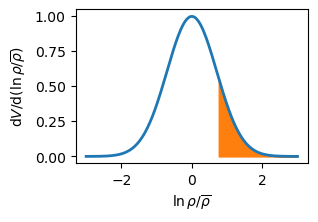

In [59]:
fig, ax = plt.subplots(figsize=(3, 2))

s = np.linspace(-3, 3, 256)

cond = s>0.75
plt.plot(s, np.exp(-s**2), lw=2)
plt.fill_between(s[cond], np.zeros_like(s)[cond], np.exp(-s**2)[cond], color='C1')

plt.xlabel(r'$\ln \rho /\overline{\rho}$')
plt.ylabel(r'${\rm d} V / {\rm d} (\ln \rho /\overline{\rho})$')

save_fig('mff_example')


In [162]:
# import libraries for I/O
import sys, os
import argparse
from astropy.io import ascii

# import libraries for computation
import numpy as np
from scipy.interpolate import interp1d

# import custom functions
from functions import get_dump_list, move_to_sim_dir, get_info, aexp_to_proper_time, get_numline
from config import BIRTH, DEATH
import const

# useful constants
boxlen = 100 * const.Mpc / const.h0 # box size
rho_crit_h0e1 = 1.88e-29 # critical density for h0 = 1

# list of columns in star logs
col_name_list = np.array(["event", "id", "level", "mass", "x_star", "y_star", "z_star", "velx_star", "vely_star", "velz_star", "density", "velx", "vely", "velz", "temp", "metallicity", "energy_turb", "mask", "b_turb", "tag", "time"])
col_unit_list = np.array(["dimless", "dimless", "dimless", "mass", "length", "length", "length", "vel", "vel", "vel", "density", "vel", "vel", "vel", "dimless", "dimless", "spec_energy", "dimless", "dimless", "dimless", "dimless"])

# prepare for eps_sf calculation
aexp_list = np.linspace(1e-3, 0.1, 1000)
time_list = np.array([aexp_to_proper_time(aexp_list[i]) for i in range(len(aexp_list))])
proper_time_to_aexp_interp = interp1d(time_list, aexp_list, fill_value='extrapolate') # quickly interpolate the scale factor given a proper time
age_universe = aexp_to_proper_time(1.0)

move_to_sim_dir(9, 'fiducial')
idx_cpu = 200

# read ids
id_list = np.load('starcat/ids.npz')['id']
match_data = np.zeros((id_list.size, 12))

# create empty histogram lists
id_list_1cpu, mass_list_1cpu, x_list_1cpu, y_list_1cpu, z_list_1cpu, velx_list_1cpu, vely_list_1cpu, velz_list_1cpu, density_list_1cpu, temp_list_1cpu, metallicity_list_1cpu, energy_turb_list_1cpu, time_list_1cpu = [], [], [], [], [], [], [], [], [], [], [], [], []

# iterate over dumps
dump_list = get_dump_list()
for dump in dump_list:
    info = get_info(dump)

    filename = "output_%.5d/stars_%.5d.out%.5d" % (dump, dump, idx_cpu)
    if not os.path.isfile(filename): continue # skip if star log file does not exist
    if get_numline(filename) <= 1: continue # skip if star log file is empty

    # read the star log
    stardata_tab = ascii.read(filename, names=col_name_list, data_start=1)

    # preprocess star log data
    stardata = {}
    for col_name in col_name_list:
        if col_name != 'mask': # mask data is sometimes corrupted
            stardata[col_name] = np.array(stardata_tab[col_name].data, dtype=float)
    if np.sum(stardata['event']==BIRTH) == 0: continue # skip if no birth events

    # convert to cgs units
    age_universe = aexp_to_proper_time(1.0, Omega_m0=info.Omega_m0, Omega_k0=info.Omega_k0, Omega_L0=info.Omega_L0, H0=info.H0)
    stardata['time'] = stardata['time'] / info.H0 + age_universe
    aexp = proper_time_to_aexp_interp(stardata['time'])
    density_unit = const.Omega_m0 * rho_crit_h0e1 * const.h0**2 / aexp**3
    time_unit = aexp**2 / const.H0
    length_unit = aexp * boxlen
    unit = dict(density=density_unit, time=time_unit, length=length_unit, mass=(density_unit * length_unit**3), vel=(length_unit / time_unit), spec_energy=(length_unit / time_unit)**2, dimless=np.ones_like(aexp))
    for col_name, col_unit in zip(col_name_list, col_unit_list):
        if col_name not in ['event', 'mask']:
            stardata[col_name] = (stardata[col_name] * unit[col_unit])[stardata['event']==BIRTH]

    # search star data
    is_match = np.isin(stardata['id'], id_list, assume_unique=True)
    if np.sum(is_match) == 0: continue

    sorter = np.argsort(id_list)
    idx_match = sorter[np.searchsorted(id_list, stardata['id'][is_match], sorter=sorter)]
    
    match_data[idx_match,0] = stardata['id'][is_match]
    match_data[idx_match,1] = stardata['mass'][is_match]
    match_data[idx_match,2] = stardata['x_star'][is_match]
    match_data[idx_match,3] = stardata['y_star'][is_match]
    match_data[idx_match,4] = stardata['z_star'][is_match]
    match_data[idx_match,5] = stardata['velx_star'][is_match]
    match_data[idx_match,6] = stardata['vely_star'][is_match]
    match_data[idx_match,7] = stardata['velz_star'][is_match]
    match_data[idx_match,8] = stardata['density'][is_match]
    match_data[idx_match,9] = stardata['temp'][is_match]
    match_data[idx_match,10] = stardata['metallicity'][is_match]
    match_data[idx_match,11] = stardata['time'][is_match]


Moving to directory '/home/za9132/scratch/romain/round9/fiducial'.
